# Checking data from the file

In [59]:
import pandas as pd

math_data = pd.read_csv('./student_data/student/student-mat.csv', delimiter=';')
por_data = pd.read_csv('./student_data/student/student-por.csv', delimiter=';')

# print(math_data.tail())
# print(por_data.tail())

combined_data = pd.concat([math_data,por_data], ignore_index=True)
combined_data

# Checking if there are students whose age is 22. Answer: yes.

# for i in combined_data['age']:
#     if(i == 22):
#         print("yes")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


## Understand what one-hot-encoding is and why I have used it here.
``Explanation``:

### Creating a heatmap to know which feature (independent variables) have an impact on the target variable (final grade).

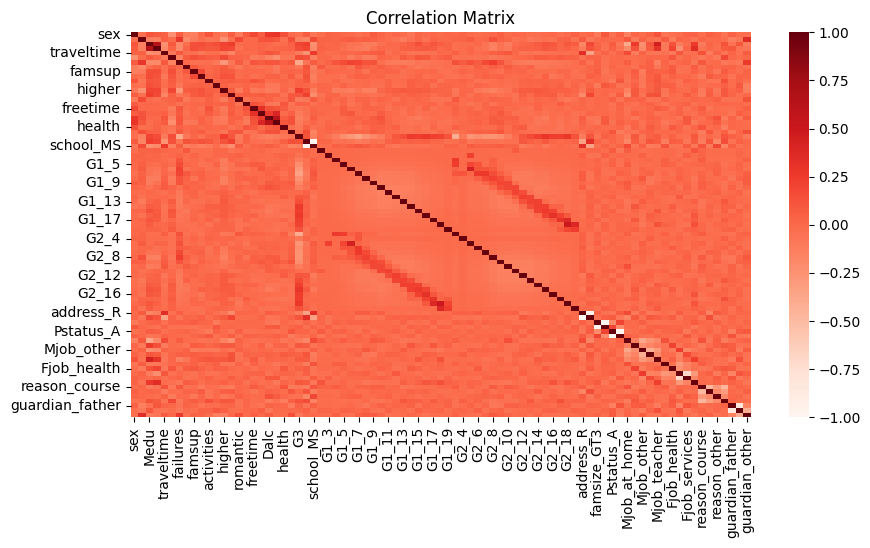

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Checking the data types of the variables


# combined_data = pd.get_dummies(combined_data, columns=['school','G1','G2','address','famsize','Pstatus','Mjob','Fjob','reason','guardian'])
# combined_data

# combined_data.iloc[0:5,85:88]
# print(combined_data.corr())

# combined_data['sex'] = combined_data['sex'].map({'F':0,'M':1})
# 'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'
# combined_data['romantic'] = combined_data['romantic'].map({'yes':1,'no':0})
# combined_data

# print(combined_data.dtypes)

# plt.figure(figsize=(10,5))
# sns.heatmap(combined_data.corr(), cmap='Reds')
# plt.title('Correlation Matrix') 
# plt.show()
